In [68]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud


In [ ]:

#Read the wine.csv

wine = pd.read_csv('wine.csv') 

In [39]:
#A Short Exploratory Data Analysis (EDA) on the dataset


#view the first 5 rows of the data 

wine.head()

#IN THIS EDA WE ARE GOING TO LOOK AT WINE CLASSIFICATION LOOKING AT THE SCORING POINT, WHERE IT COMES FROM (COUNTRY), WE WILL ALSO LOOK AT THE BEST MANUFACTURES AND TOP VARIETY OF THESE WINES


,country,description,designation,points,price,province,region_1,region_2,variety,winery,scoring_scale
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,classic
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez,classic
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,classic
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,classic
4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude,classic


In [38]:
#Details of the dataframe

#Check for missing values per column
isnull =  wine.isnull().sum()

#Dataframe shape
shape = wine.shape

#Check index
index = wine.index

#Check for duplicates
duplicates = wine.duplicated().sum()

#dataframe descriptive statistics
summary = wine.describe()

#number of rows and columns
rows = len(wine)
columns = wine.columns

#data types
dt = wine.dtypes


print("+---------------------------+")
print("|    Dataframe Summary      |")
print("+---------------------------+")
print("\n")
print("Data Types: \n\n", dt)
print("\n===============\nIndex: \n\n", index)
print("\n===============\nMissing Values: \n\n", isnull)
print("\n===============\nDuplicates: \n\n", duplicates)
print("\n===============\nRows: \n\n", rows)
print("\n===============\nColumns: \n\n", columns)
print("\n===============\nDataframe Shape: \n\n", shape)
print("\n===============\nSummary: \n\n", summary)
print("+---------------------------+")
print("|   End Of Wine Summary     |")
print("+---------------------------+")



+---------------------------+
|    Dataframe Summary      |
+---------------------------+


Data Types: 

 country            object
description        object
designation        object
points              int64
price             float64
province           object
region_1           object
region_2           object
variety            object
winery             object
scoring_scale    category
dtype: object

Index: 

 Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102],
           dtype='int64', length=1061)

Missing Values: 

 country            0
description        0
designation      258
points             0
price             54
province           0
region_1         163
region_2         586
variety            0
winery             0
scoring_scale      0
dtype: int64

Duplicates: 

 0

Rows: 

 1061

Columns: 

 Index(['country', 'description', 'designation', 'points', 'price', 'prov

In [6]:
#delete rows that have identical values in every columns

wine.drop_duplicates(inplace=True)

In [40]:
#Top 10 Most Expensive Wines based on their  description and Country of origin

wine.loc[:,['country', 'description', 'price']].sort_values('price', ascending=False).head(10).reset_index()

,index,country,description,price
0,898,Italy,"Aromas of crushed plum, asphalt, oak, toast, e...",500.0
1,16,US,"This blockbuster, powerhouse of a wine suggest...",325.0
2,18,France,Coming from a seven-acre vineyard named after ...,290.0
3,954,Italy,"Dense and concentrated, this blend of 66% Cabe...",240.0
4,0,US,This tremendous 100% varietal wine hails from ...,235.0
5,22,Spain,Tarry blackberry and cheesy oak aromas are app...,220.0
6,231,US,"From a seven-acre section of the vineyard, thi...",200.0
7,14,US,"With its sophisticated mix of mineral, acid an...",185.0
8,313,US,This impressive 100% varietal wine shows focus...,155.0
9,916,US,"Earthy with dusty loam and forest scents, this...",150.0


In [9]:
#Each and every wine is tasted and rated by tasters on a 0-100 point scale.
#We are going to group the points column to archive this

wine.points.describe()

count    1061.000000
mean       89.699340
std         2.414791
min        85.000000
25%        88.000000
50%        90.000000
75%        91.000000
max        96.000000
Name: points, dtype: float64

In [31]:
wine['scoring_scale'] = pd.cut(wine.points, (84,89,94,100), labels=['very good', 'outstanding', 'classic'])

In [13]:
#The influence of scoring_points on price
wine.loc[wine.price > 200, ['designation', 'scoring_scale']].head(10)



scoring_scale
very_good      286
outstanding    492
classic         25
Name: designation, dtype: int64

In [ ]:
#Group wine by scoring_scale and count how the companies are doing in terms of producing quality wine

wine.groupby('scoring_scale').designation.count()

<AxesSubplot:xlabel='scoring_scale', ylabel='count'>

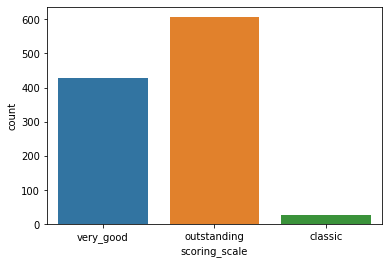

In [16]:
import seaborn as sns
sns.countplot(x='scoring_scale', data=wine)

In [17]:
#Top outstanding wines you'd recommend?

wine.loc[wine['scoring_scale'] == 'outstanding', ['country', 'designation', 'price', 'variety', 'points']].head()


,country,designation,price,variety,points
25,New Zealand,Mat√©'s Vineyard,57.0,Chardonnay,94
26,US,Shea Vineyard,62.0,Pinot Noir,94
27,US,Abetina,105.0,Pinot Noir,94
28,US,Garys' Vineyard,60.0,Pinot Noir,94
29,US,The Funk Estate,60.0,Syrah,94


<AxesSubplot:xlabel='price', ylabel='Density'>

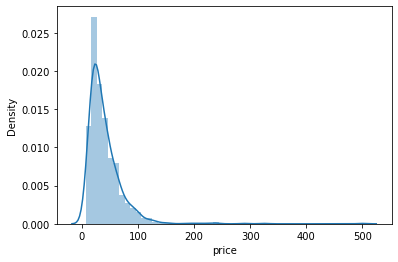

In [41]:
#Look at the price scale visually
#
#Drop the missing values in the price column first
#Then we plot our values

sns.distplot(wine.price.dropna())

<AxesSubplot:ylabel='variety'>

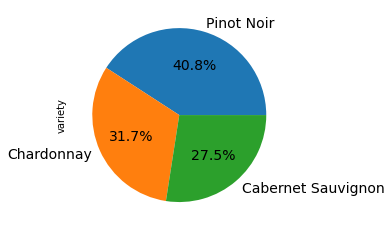

In [62]:
#Selects the top 3 wine Variety

top3_variety = wine.variety.value_counts().head(3)
top3_variety.plot(kind='pie', autopct='%1.1f%%', legend=False, fontsize=14)

<AxesSubplot:>

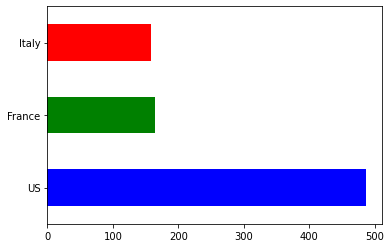

In [45]:
#Selects top 3 Wine Manufacturing Countries

top_manufacturers = wine.country.value_counts()
top3_manufacturers = top_manufacturers.iloc[0:3]
top3_manufacturers.plot(kind='barh', color=['b', 'g', 'r'])

In [65]:
#There are some missing values in the data. Would you undertake imputation? If yes How? Please outline this in the notebook.

#First we need to check for the missing values just to confirm that they are there.

wine.isnull().sum()

country            0
description        0
designation      258
points             0
price             54
province           0
region_1         163
region_2         586
variety            0
winery             0
scoring_scale      0
dtype: int64

In [ ]:
#We can clearly see from the data above that there are missing values however by my analysis I don't think the effect of these values on our EDA was too much.abs

#We can try to fix the data in the following ways:
#We know that when it comes to price we can use interpolation to fill or by the utilization of the price.mean() looking at the scoring_scale column

#When it comes to rigion_1 and region_2 we are quite aware that the relationship between those columns and province, country are high so K nearest neighbour will work just fine in this regard. The smae would apply if we look at the designation

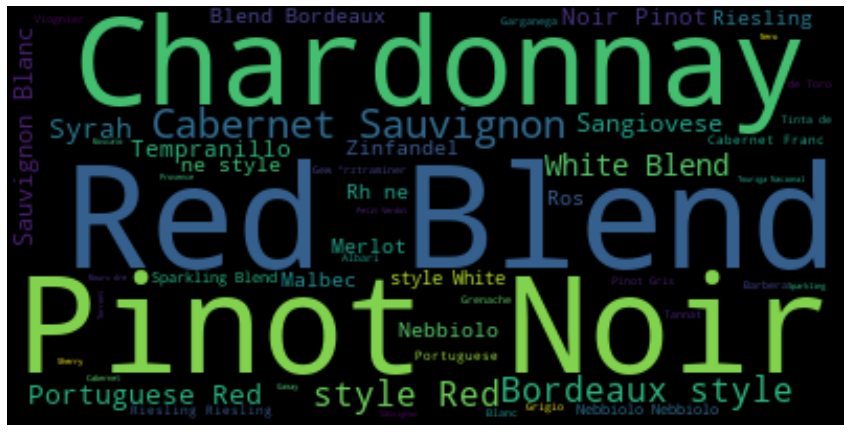

In [79]:
#Word Cloud for Province and Variety

#We first need to create a list that contains the province and variety rows and we combine them into one string respectively

#Starting with Variety


vary = list(wine.variety)
variety = ' '.join(vary)

plt.figure(figsize=(15,23))
wordcloud = WordCloud(background_color='black').generate(variety)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)



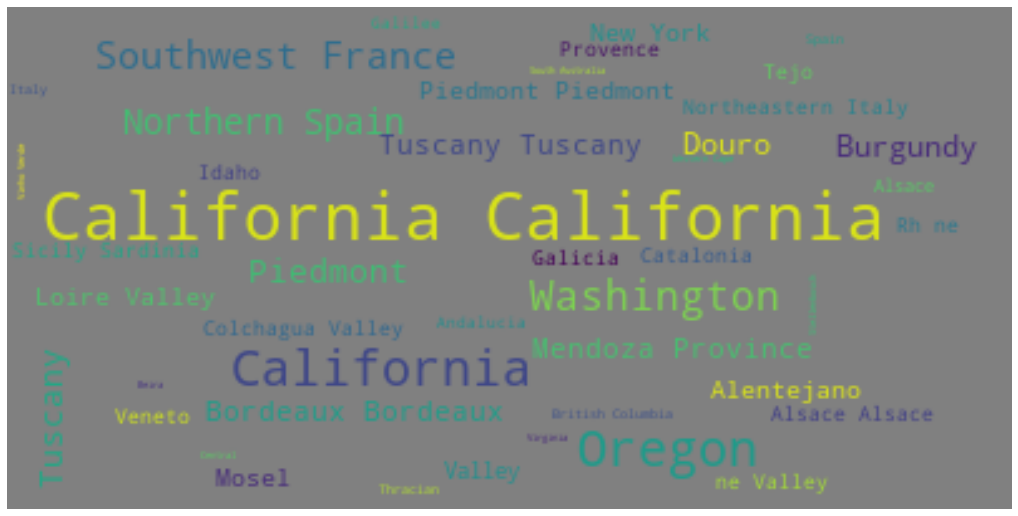

In [81]:
prov = list(wine.province)
province = ' '.join(prov)

plt.figure(figsize=(18,28))

wordcloud = WordCloud(background_color='gray').generate(province)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y=0)